In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


In [86]:
(ds_train, ds_val, ds_test), info = tfds.load(
    'stanford_dogs',
    split=['train[:90%]', 'train[90%:]', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [3]:
def normalize_and_resize_img(image, label):
    # Normalizes images: `uint8` -> `float32`
    image = tf.image.resize(image, [224, 224])
    return tf.cast(image, tf.float32) / 255., label

def augment(image,label):
#     print('augment')
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta = 0.2)
    image = tf.clip_by_value(image, 0, 1)
    return image, label

def augment2(image, label):
    
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta = 0.2)
    image = tf.image.random_contrast(image, 1/1.3, 1.3)
    image = tf.image.random_hue(image, 0.1)
#     image = tf.keras.preprocessing.image.random_rotation(image, 90)

#     random_height = tf.random.uniform((), minval=32, maxval=40, dtype=tf.int32)
#     random_width = tf.random.uniform((), minval=32, maxval=40, dtype=tf.int32)
#     image = tf.image.resize(image, (random_height, random_width))
#     image = tf.image.random_crop(image, (32, 32, 3))
    return image, label

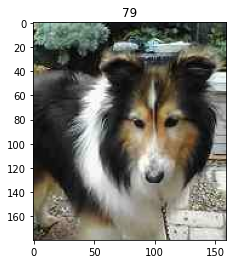

In [9]:
sample = ds_train.take(1)
smp_img, smp_y = None, None
for s in sample: 
    smp_img = s[0]
    smp_y = s[1]
    print()

plt.title(smp_y.numpy())
plt.imshow(tf.keras.preprocessing.image.array_to_img(smp_img))
plt.show()

In [65]:
def plot_aug(col,row,aug, img, y):
    plt.figure(0, figsize=(15, 15))
    plots = []
    for i in range(row):
        for j in range(col):
            image, label = normalize_and_resize_img(img, y)
            image, label = aug(image, label)
#             print(tf.reduce_min(image),tf.reduce_max(image))
            image = tf.keras.preprocessing.image.array_to_img(image)
            ax = plt.subplot2grid((row,col), (i,j))
            ax.imshow(image)
    plt.show() 

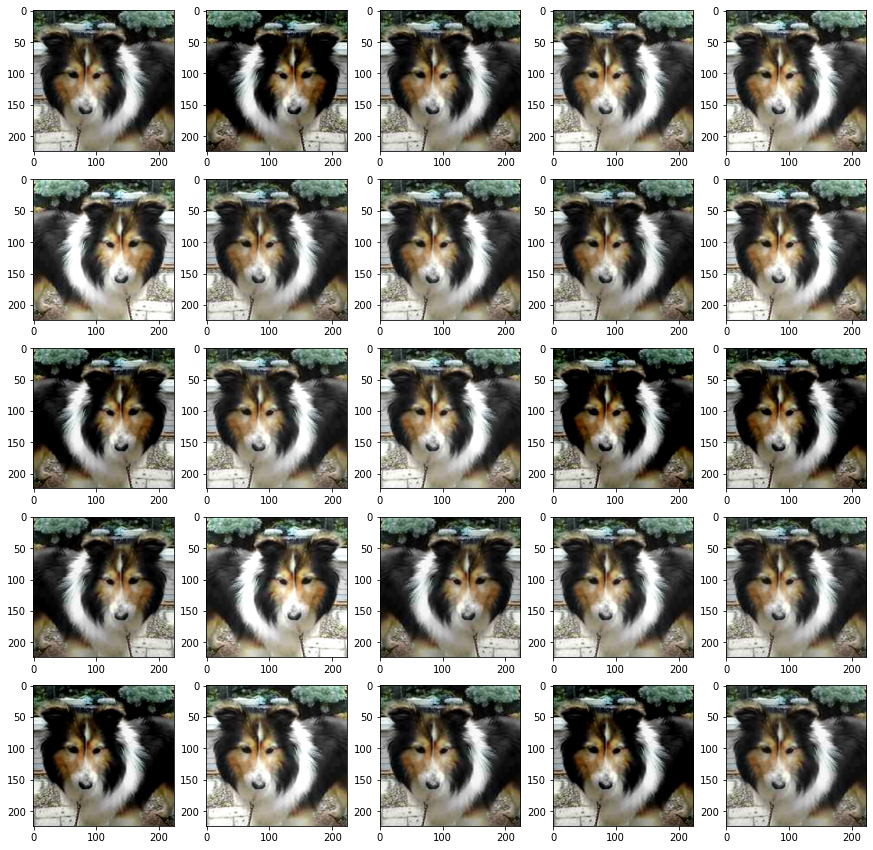

In [66]:
plot_aug(5, 5, augment, smp_img, smp_y)

tf.Tensor(0.13809963, shape=(), dtype=float32) tf.Tensor(1.2739068, shape=(), dtype=float32)
tf.Tensor(0.13170348, shape=(), dtype=float32) tf.Tensor(1.1215278, shape=(), dtype=float32)
tf.Tensor(-0.21792279, shape=(), dtype=float32) tf.Tensor(1.05466, shape=(), dtype=float32)
tf.Tensor(-0.15890521, shape=(), dtype=float32) tf.Tensor(0.80514354, shape=(), dtype=float32)
tf.Tensor(-0.06983059, shape=(), dtype=float32) tf.Tensor(0.87428606, shape=(), dtype=float32)
tf.Tensor(-0.06748928, shape=(), dtype=float32) tf.Tensor(1.1981848, shape=(), dtype=float32)
tf.Tensor(-0.052721858, shape=(), dtype=float32) tf.Tensor(1.0261731, shape=(), dtype=float32)
tf.Tensor(-0.033623315, shape=(), dtype=float32) tf.Tensor(0.79563993, shape=(), dtype=float32)
tf.Tensor(-0.08737071, shape=(), dtype=float32) tf.Tensor(0.9734148, shape=(), dtype=float32)
tf.Tensor(-0.12864642, shape=(), dtype=float32) tf.Tensor(0.9758761, shape=(), dtype=float32)
tf.Tensor(-0.17120813, shape=(), dtype=float32) tf.Tensor(1

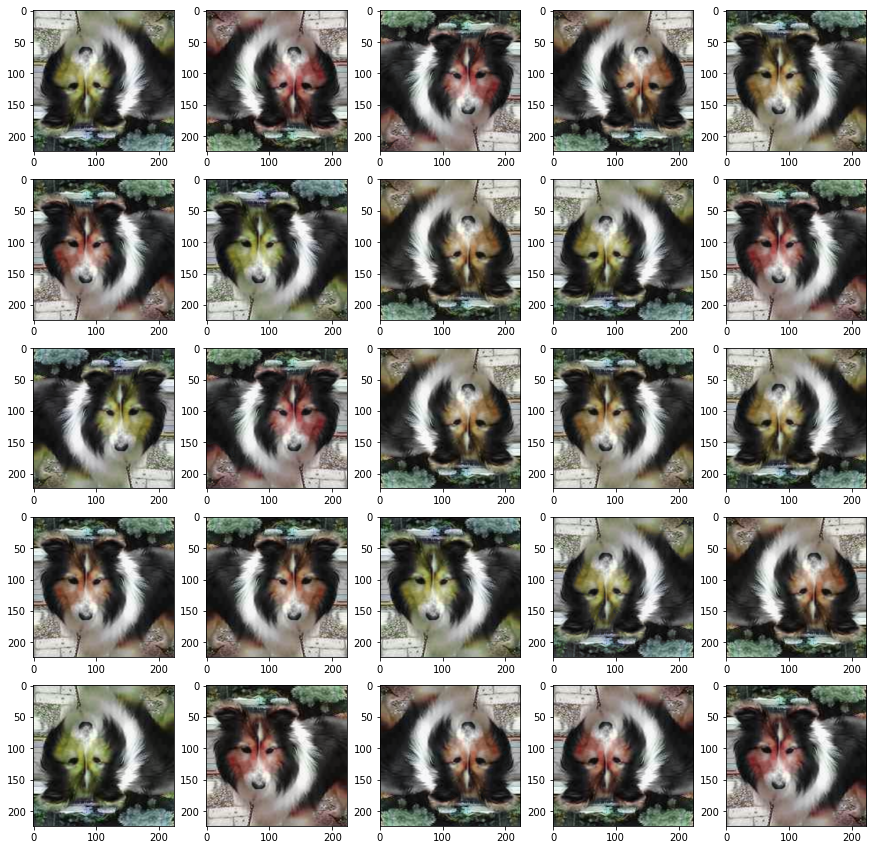

In [48]:
plot_aug(5, 5, augment2, smp_img, smp_y)

In [14]:
!pip install tensorflow-addons

In [ ]:
import tensorflow_addons as tfa

In [63]:
def augment3(image, label):
    random_angle = tf.random.uniform(shape=[], minval=0, maxval=0.785398)  # 0.785398는 45도를 라디안으로 표현한 값
    image = tfa.image.rotate(image, random_angle, interpolation='BILINEAR')
    
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.clip_by_value(image, 0, 1)
    
    return image, label


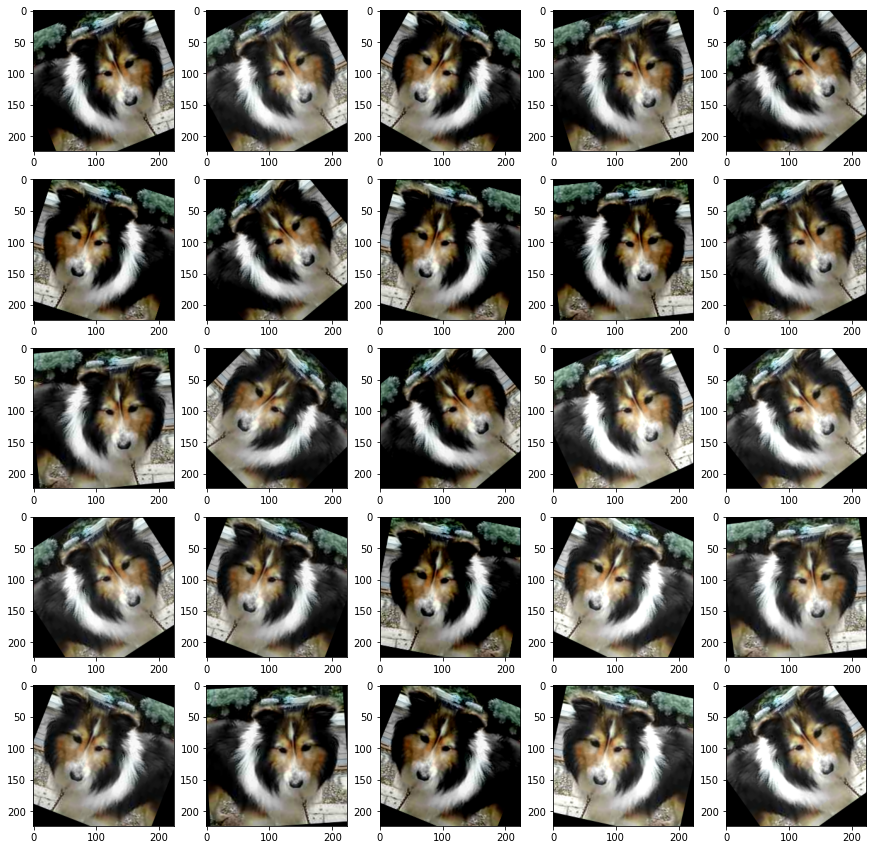

In [69]:
plot_aug(5, 5, augment3, smp_img, smp_y)

In [70]:
def augment4(image, label):
    # 무작위로 이미지를 회전 (0도에서 45도 사이의 무작위 회전)
    random_angle = tf.random.uniform(shape=[], minval=0, maxval=0.785398)  # 0.785398는 45도를 라디안으로 표현한 값
    image = tfa.image.rotate(image, random_angle, interpolation='BILINEAR')
    
    # 무작위로 이미지 좌우 반전
    image = tf.image.random_flip_left_right(image)
    
    # 무작위로 이미지 이동, 전단, 확대/축소
    shift_param = tf.random.uniform(shape=[], minval=0, maxval=0.2)  # 최대 이동 비율
    shear_param = tf.random.uniform(shape=[], minval=-0.2, maxval=0.2)  # 전단 각도 범위
    zoom_param = tf.random.uniform(shape=[], minval=0.8, maxval=1.2)  # 확대/축소 비율 범위
    image = tfa.image.transform(image, [1.0, shear_param, shift_param, 0.0, zoom_param, 0.0, 0.0, 0.0])
    
#     # 밝기 조절 등 다른 Augmentation 적용
#     image = tf.image.random_brightness(image, max_delta=0.2)
#     image = tf.clip_by_value(image, 0, 1)
    
    return image, label

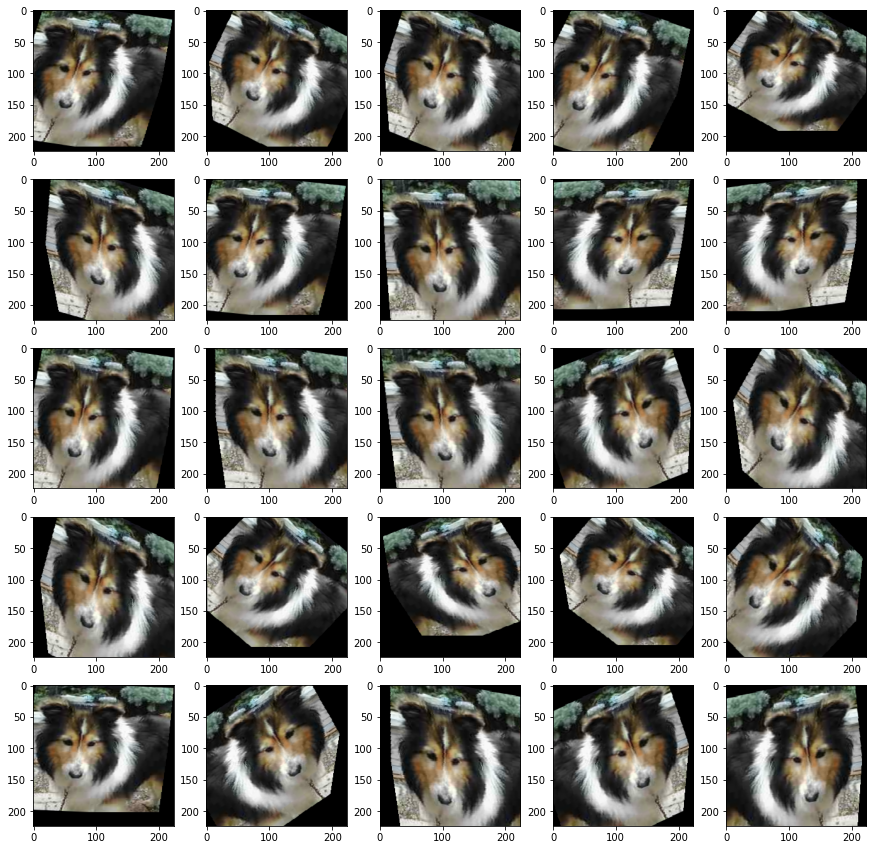

In [71]:
plot_aug(5, 5, augment4, smp_img, smp_y)

In [37]:
image, label = normalize_and_resize_img(smp_img, smp_y)
print(tf.reduce_min(image),tf.reduce_max(image))
image, label = apply_augmentation(image, label)
tf.reduce_min(image),tf.reduce_max(image)

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.99996835>)

In [84]:
def onehot(image, label):
    label = tf.one_hot(label, num_classes)
    return image, label

def apply_normalize_on_dataset(ds, augmentation, is_test=False, batch_size=16, with_aug=False):
    ds = ds.map(
        normalize_and_resize_img, 
        num_parallel_calls=2
    )
    
    # 일반 aug 적용
    if not is_test and with_aug:
        ds = ds.map(
            augmentation
        )
    ds = ds.batch(batch_size)
    ds = ds.map(
            onehot,
            num_parallel_calls=2
        )
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
            
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

In [54]:
num_classes = info.features["label"].num_classes

In [92]:
# base resnet-50 사용
resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])

In [87]:
ds_train_aug = apply_normalize_on_dataset(ds_train, augment3, with_aug=False)
ds_val = apply_normalize_on_dataset(ds_val, augment3, is_test=False)
ds_test = apply_normalize_on_dataset(ds_test, augment3, is_test=True)

In [80]:
EPOCH = 20

In [93]:
resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

history_resnet50 = resnet50.fit(
    ds_train_aug, # augmentation 적용하지 않은 데이터셋 사용
    steps_per_epoch=int(info.splits['train'].num_examples/16),
    validation_steps=int(info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_val,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
750/750 [==============================] - 163s 209ms/step - loss: 2.1299 - accuracy: 0.4692 - val_loss: 3.3922 - val_accuracy: 0.2093
Epoch 2/20
750/750 [==============================] - 155s 207ms/step - loss: 0.6188 - accuracy: 0.8357 - val_loss: 1.1686 - val_accuracy: 0.6532
Epoch 3/20
750/750 [==============================] - 155s 207ms/step - loss: 0.1720 - accuracy: 0.9700 - val_loss: 0.9408 - val_accuracy: 0.7185
Epoch 4/20
750/750 [==============================] - 155s 207ms/step - loss: 0.0527 - accuracy: 0.9959 - val_loss: 0.9311 - val_accuracy: 0.7104
Epoch 5/20
750/750 [==============================] - 155s 207ms/step - loss: 0.0246 - accuracy: 0.9988 - val_loss: 0.9625 - val_accuracy: 0.7135
Epoch 6/20
750/750 [==============================] - 155s 207ms/step - loss: 0.0213 - accuracy: 0.9992 - val_loss: 0.9602 - val_accuracy: 0.7172
Epoch 7/20
750/750 [==============================] - 156s 207ms/step - loss: 0.0125 - accuracy: 0.9994 - val_loss: 0.9814 -

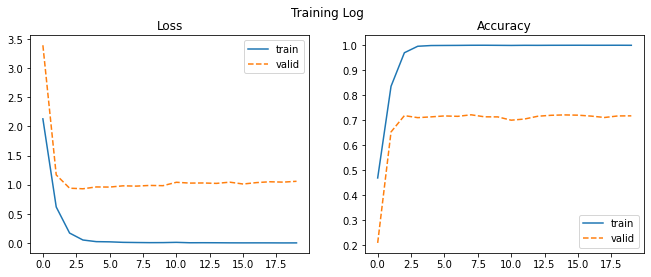

In [100]:
fig, ax = plt.subplots(1,2, figsize=(11,4))
fig.suptitle('Training Log')

ax[0].plot(range(len(history_resnet50.history['loss'])), history_resnet50.history['loss'], label = 'train')
ax[0].plot(range(len(history_resnet50.history['loss'])), history_resnet50.history['val_loss'],'--', label = 'valid')
ax[0].set_title('Loss')
ax[0].legend()
ax[1].plot(range(len(history_resnet50.history['accuracy'])), history_resnet50.history['accuracy'], label = 'train')
ax[1].plot(range(len(history_resnet50.history['accuracy'])), history_resnet50.history['val_accuracy'],'--', label = 'valid')
ax[1].set_title('Accuracy')
ax[1].legend()

plt.show()

In [102]:
# del ds_train_aug
loss, accuracy = resnet50.evaluate(ds_test)
resnet50.save('resnet50_aug3.hdf5')

print('Resnet-50 with aug3')
print(f"Loss: {loss},\nAccuracy: {accuracy}")


537/537 [==============================] - 26s 48ms/step - loss: 1.0518 - accuracy: 0.7362
Resnet-50 with aug3
Loss: 1.0518378019332886,
Accuracy: 0.7362470626831055


In [111]:
ds_train_aug = apply_normalize_on_dataset(ds_train, augment4, with_aug=False)

In [112]:
resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])

resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

history_resnet50 = resnet50.fit(
    ds_train_aug, # augmentation 적용하지 않은 데이터셋 사용
    steps_per_epoch=int(info.splits['train'].num_examples/16),
    validation_steps=int(info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_val,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
750/750 [==============================] - 163s 208ms/step - loss: 2.1727 - accuracy: 0.4552 - val_loss: 3.1790 - val_accuracy: 0.2437
Epoch 2/20
750/750 [==============================] - 156s 207ms/step - loss: 0.6600 - accuracy: 0.8242 - val_loss: 1.0927 - val_accuracy: 0.6833
Epoch 3/20
750/750 [==============================] - 156s 208ms/step - loss: 0.1935 - accuracy: 0.9643 - val_loss: 0.9444 - val_accuracy: 0.7205
Epoch 4/20
750/750 [==============================] - 156s 207ms/step - loss: 0.0653 - accuracy: 0.9940 - val_loss: 0.9459 - val_accuracy: 0.7227
Epoch 5/20
750/750 [==============================] - 156s 207ms/step - loss: 0.0291 - accuracy: 0.9986 - val_loss: 0.9421 - val_accuracy: 0.7158
Epoch 6/20
750/750 [==============================] - 156s 208ms/step - loss: 0.0172 - accuracy: 0.9992 - val_loss: 0.9648 - val_accuracy: 0.7113
Epoch 7/20
750/750 [==============================] - 156s 208ms/step - loss: 0.0214 - accuracy: 0.9987 - val_loss: 0.9901 -

In [113]:
del ds_train_aug
loss, accuracy = resnet50.evaluate(ds_test)
resnet50.save('resnet50_aug4.hdf5')

print('Resnet-50 with aug4')
print(f"Loss: {loss},\nAccuracy: {accuracy}")

with open('history_resnet50_aug4.pickle','wb') as f:
    pickle.dump(history_resnet50.history,f)
    
del history_resnet50
del resnet50

537/537 [==============================] - 27s 50ms/step - loss: 1.0242 - accuracy: 0.7407
Resnet-50 with aug4
Loss: 1.024214506149292,
Accuracy: 0.7406759858131409


In [114]:


with open('history_resnet50_no_aug.pickle','rb') as f:
    history0 = pickle.load(f)
    
with open('history_resnet50_aug.pickle','rb') as f:
    history1 = pickle.load(f)
with open('history_resnet50_aug2.pickle','rb') as f:
    history2 = pickle.load(f)
with open('history_resnet50_aug3.pickle','rb') as f:
    history3 = pickle.load(f)
with open('history_resnet50_aug4.pickle','rb') as f:
    history4 = pickle.load(f)
    

In [117]:
histories = [history0, history1, history2, history3, history4]

In [121]:
names = ['Resnet50','Augment1','Augment2','Augment3','Augment4']
# tutorial, custom1 custom2, custom3

colors = ['g','brown','b','deeppink']
lines = ['solid','dashed']

In [116]:
def show_log(metric, histories, names, each = False, valid = True):
    if each :
        fig, ax = plt.subplots(1,len(histories), figsize=(23,5))
        
        ax[0].plot(range(len(histories[0][metric])), histories[0][metric], color = colors[0], linestyle = lines[0], label = names[0])
        ax[0].plot(range(len(histories[0]['val_'+metric])), histories[0]['val_'+metric], color = colors[0], linestyle = lines[1], label = 'valid')
        ax[0].set_title(names[0])
        ax[0].legend()
        ax[1].plot(range(len(histories[1][metric])), histories[1][metric], color = colors[1], linestyle = lines[0], label = names[1])
        ax[1].plot(range(len(histories[1]['val_'+metric])), histories[1]['val_'+metric], color = colors[1], linestyle = lines[1], label = 'valid')
        ax[1].legend()
        ax[1].set_title(names[1])
        ax[2].plot(range(len(histories[2][metric])), histories[2][metric], color = colors[2], linestyle = lines[0], label = names[2])
        ax[2].plot(range(len(histories[2]['val_'+metric])), histories[2]['val_'+metric], color = colors[2], linestyle = lines[1], label = 'valid')
        ax[2].set_title(names[2])
        ax[2].legend()
        ax[3].plot(range(len(histories[3][metric])), histories[3][metric], color = colors[3], linestyle = lines[0], label = names[3])
        ax[3].plot(range(len(histories[3]['val_'+metric])), histories[3]['val_'+metric], color = colors[3], linestyle = lines[1], label = 'valid')
        ax[3].set_title(names[2])
        ax[3].legend()
        plt.suptitle(f'Training and Validation Log for {metric}')
        
    else :
        if metric == 'both':
            
            fig, ax = plt.subplots(1,2, figsize=(20,8))
            fig.suptitle('Training Log')
            
            ax[0].plot(range(len(histories[0]['loss'])), histories[0]['loss'],color = colors[0], linestyle = lines[0], label = names[0])
            ax[0].plot(range(len(histories[1]['loss'])), histories[1]['loss'],color = colors[1], linestyle = lines[0], label = names[1])
            ax[0].plot(range(len(histories[2]['loss'])), histories[2]['loss'],color = colors[2], linestyle = lines[0], label = names[2])
            ax[0].plot(range(len(histories[3]['loss'])), histories[3]['loss'],color = colors[3], linestyle = lines[0], label = names[3])
            
            ax[1].plot(range(len(histories[0]['accuracy'])), histories[0]['accuracy'],color = colors[0], linestyle = lines[0], label = names[0])
            ax[1].plot(range(len(histories[1]['accuracy'])), histories[1]['accuracy'],color = colors[1], linestyle = lines[0], label = names[1])
            ax[1].plot(range(len(histories[2]['accuracy'])), histories[2]['accuracy'],color = colors[2], linestyle = lines[0], label = names[2])
            ax[1].plot(range(len(histories[3]['accuracy'])), histories[3]['accuracy'],color = colors[3], linestyle = lines[0], label = names[3])
            
            if valid :
                ax[0].plot(range(len(histories[0]['loss'])), histories[0]['val_loss'],color = colors[0], linestyle = lines[1], label = 'val_'+names[0])
                ax[0].plot(range(len(histories[1]['loss'])), histories[1]['val_loss'],color = colors[1], linestyle = lines[1], label = 'val_'+names[1])
                ax[0].plot(range(len(histories[2]['loss'])), histories[2]['val_loss'],color = colors[2], linestyle = lines[1], label = 'val_'+names[2])
                ax[0].plot(range(len(histories[3]['loss'])), histories[3]['val_loss'],color = colors[3], linestyle = lines[1], label = 'val_'+names[3])
                
                ax[1].plot(range(len(histories[0]['accuracy'])), histories[0]['val_accuracy'],color = colors[0], linestyle = lines[1], label = 'val_'+names[0])
                ax[1].plot(range(len(histories[1]['accuracy'])), histories[1]['val_accuracy'],color = colors[1], linestyle = lines[1], label = 'val_'+names[1])
                ax[1].plot(range(len(histories[2]['accuracy'])), histories[2]['val_accuracy'],color = colors[2], linestyle = lines[1], label = 'val_'+names[2])
                ax[1].plot(range(len(histories[3]['accuracy'])), histories[3]['val_accuracy'],color = colors[3], linestyle = lines[1], label = 'val_'+names[3])
            ax[0].set_title('Loss')
            ax[0].legend()
            ax[1].set_title('Accuracy')
            ax[1].legend()
        else:
            plt.figure(figsize=(4,4))
            plt.plot(range(len(histories[0][metric])), histories[0][metric],color = colors[0], linestyle = lines[0], label = names[0])
            plt.plot(range(len(histories[1][metric])), histories[1][metric],color = colors[1], linestyle = lines[0], label = names[1])
            plt.plot(range(len(histories[2][metric])), histories[2][metric],color = colors[2], linestyle = lines[0], label = names[2])
            plt.plot(range(len(histories[3][metric])), histories[3][metric],color = colors[3], linestyle = lines[0], label = names[3])
            plt.title(f'Training Log for: {metric}')

            if (metric != 'both') and valid:
                plt.plot(range(len(histories[0]['val_'+metric])), histories[0]['val_'+metric], color = colors[0], linestyle = lines[1], label = 'val_'+names[0])
                plt.plot(range(len(histories[1]['val_'+metric])), histories[1]['val_'+metric], color = colors[1], linestyle = lines[1], label = 'val_'+names[1])
                plt.plot(range(len(histories[2]['val_'+metric])), histories[2]['val_'+metric], color = colors[2], linestyle = lines[1], label = 'val_'+names[2])
                plt.plot(range(len(histories[3]['val_'+metric])), histories[3]['val_'+metric], color = colors[3], linestyle = lines[1], label = 'val_'+names[3])



    plt.legend()       
    plt.show()

In [110]:
def Compare_log(title, history1, history2 , names, valid = True):
    fig, ax = plt.subplots(1,2, figsize=(15,7))
    
    fig.suptitle(title, fontsize = 15)
    ax[0].plot(range(len(history1['loss'])), history1['loss'], color = colors[0], linestyle = lines[0],label = names[0])
    ax[0].plot(range(len(history2['loss'])), history2['loss'], color = colors[1], linestyle = lines[0],label = names[1])
    if valid :
        ax[0].plot(range(len(history1['val_loss'])), history1['val_loss'], color = colors[0], linestyle = lines[1],label = 'val_'+names[0])
        ax[0].plot(range(len(history2['val_loss'])), history2['val_loss'], color = colors[1], linestyle = lines[1],label = 'val_'+names[1])
        ax[0].set_title('Training and Validation Loss')
    else: 
        ax[0].set_title('Training Loss')  
    ax[0].legend()


    ax[1].plot(range(len(history1['accuracy'])), history1['accuracy'], color = colors[0], linestyle = lines[0],label = names[0])
    ax[1].plot(range(len(history2['accuracy'])), history2['accuracy'], color = colors[1], linestyle = lines[0],label = names[1])
    if valid :
        ax[1].plot(range(len(history1['accuracy'])),history1['val_accuracy'], color = colors[0], linestyle = lines[1],label = 'val_'+names[0])
        ax[1].plot(range(len(history2['accuracy'])),history2['val_accuracy'], color = colors[1], linestyle = lines[1],label = 'val_'+names[1])
        ax[1].set_title('Training and Validation Accuracy')
    else:
        ax[1].set_title('Training Loss')  
    ax[1].legend()
    plt.show()

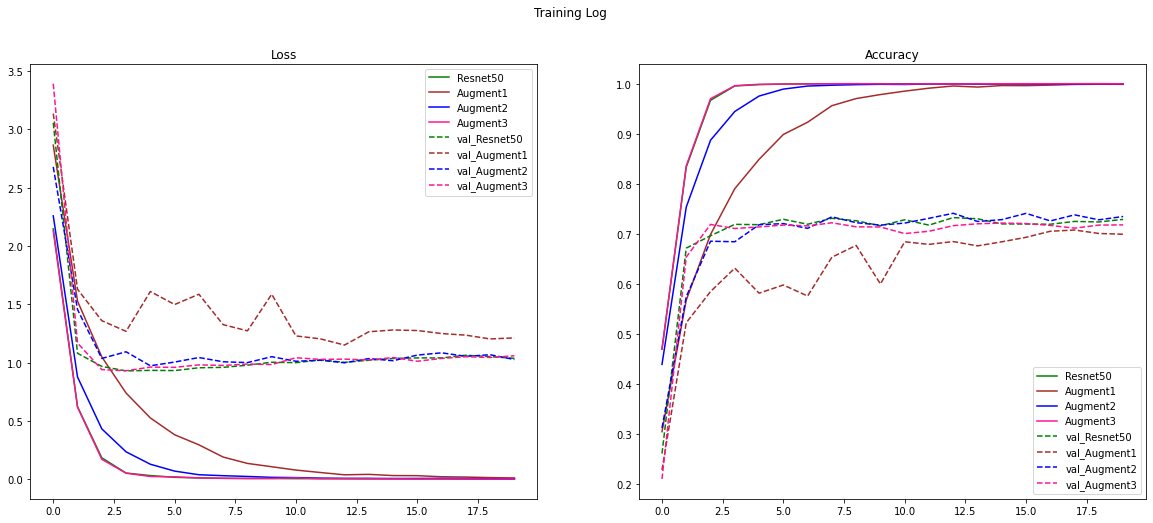

In [122]:
show_log('both', histories, names)

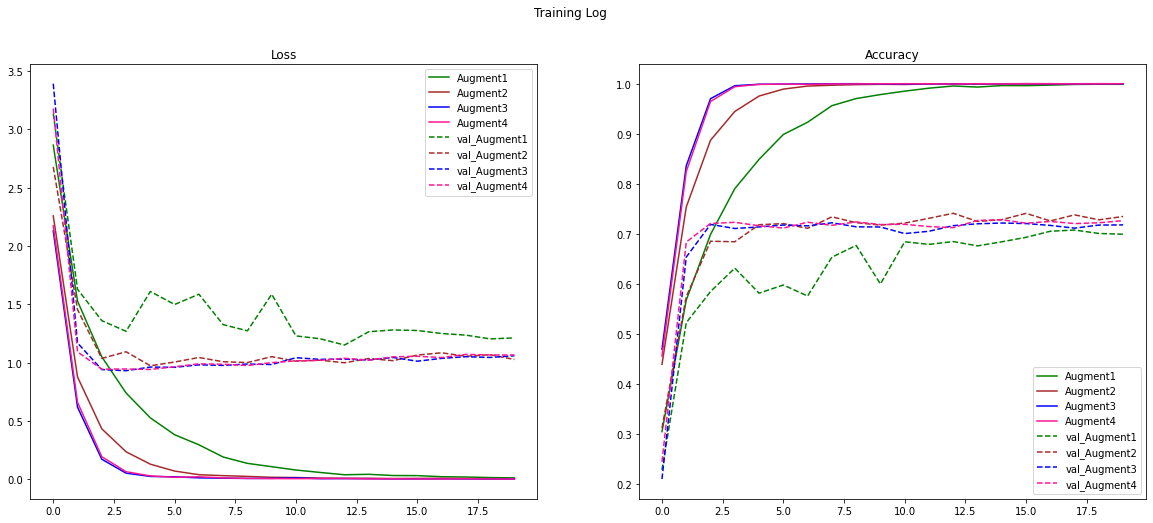

In [123]:
show_log('both', histories[1:], names[1:])

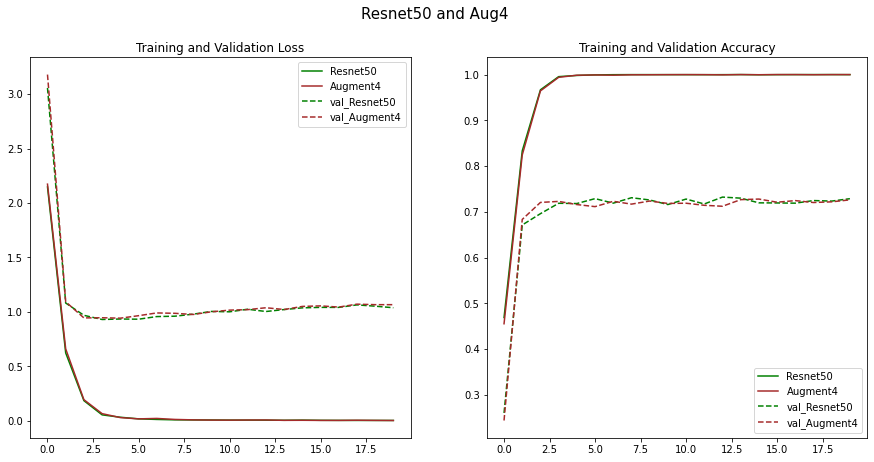

In [124]:
Compare_log('Resnet50 and Aug4', history0, history4 , [names[0],names[4]], valid = True)

성능이 떨어지거나 원래 데이터세트와 비슷한 성능을 보임

GPT에 물어보면 아래와 같이 대답해줌 

1. Augmentation 과정의 실수: Augmentation을 적용하는 과정에서 실수로 데이터를 왜곡하거나 손상시킬 수 있습니다. 예를 들어, 회전, 이동, 전단 등의 Augmentation을 지나치게 크게 적용하면 원래의 데이터 분포와 크게 다르게 될 수 있습니다. Augmentation을 적용할 때 각각의 변환에 대한 범위나 크기를 조절해보는 것도 고려해볼 만합니다.

2. Augmentation의 조합: 다양한 Augmentation 기법을 조합하면 원래 데이터와는 매우 다른 데이터를 생성할 수 있습니다. 모든 Augmentation 기법이 합쳐져서 데이터 분포를 크게 왜곡하거나 클래스 간의 경계를 모호하게 만들 수 있습니다.

3. Overfitting: Augmentation을 지나치게 많이 적용하면 모델이 훈련 데이터에 과적합될 수 있습니다. Augmentation을 너무 많이 사용하면 모델이 Augmentation 된 데이터만을 기억하게 되고, 실제 테스트 데이터에서 성능이 저하될 수 있습니다.

4. 모델의 복잡도: Augmentation을 적용한 데이터셋은 본질적으로 원래 데이터셋보다 더 복잡한 데이터 분포를 갖습니다. 모델의 복잡도가 충분하지 않거나 모델이 Augmentation으로 생성된 데이터를 적절하게 처리하지 못할 경우 성능 저하가 발생할 수 있습니다.

5. Augmentation 적용 순서: Augmentation을 적용하는 순서에 따라 결과가 다를 수 있습니다. 어떤 Augmentation을 먼저 적용하느냐에 따라 모델의 학습 방향이나 특성이 달라질 수 있습니다.

6. Augmentation 적용 범위 조정: 특정 Augmentation 기법의 범위나 강도를 조절하여 실험해보는 것도 좋은 방법입니다. 모든 Augmentation을 최대로 적용하지 않고, 각각의 Augmentation에 적절한 범위나 강도를 설정하여 실험해보세요.

요약하면, augmentation이 적절하지 않았다. 정도로 볼 수 있을 듯. 너무 적은 데이터세트가 아니라면 augmentation 방법을 적용하는 것은 상당한 effort가 들어가는 문제가 아닌가 싶음.